Learning Dynamics of RBMs in Ising Model
=====================

TODO
-----
1. Change beta and system size, learning rate and the number of training samples.
2. Change the 1D model to mean field model.
3. Check if the model performs significantly worst with the Bernoulli and not spin - the system should learn this.
4. Increase the batch size to decrease noise.

In [2]:
import sys
import os
sys.path.append('Jerome_scripts_Original/PGM/')
sys.path.append('selfPackages/')
sys.path.append('Jerome_scripts_Original/')

import numpy as np
import scipy as sc
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

try:
    import rbm
    import bm
except:
    print 'Compiling cy_utilities first'
    curr_dir = os.getcwd()
    os.chdir('PGM/')
    !python setup.py build_ext --inplace
    print 'Compilation done'
    os.chdir(curr_dir)
    
import pickle
from ising import IsingModel
import estimate_correlations_ising
from sklearn.utils import shuffle
import inlineMovies

(10000, 100)


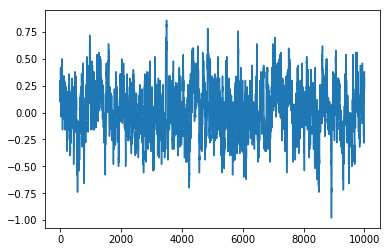

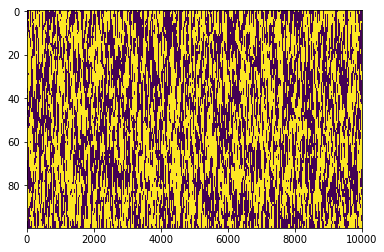

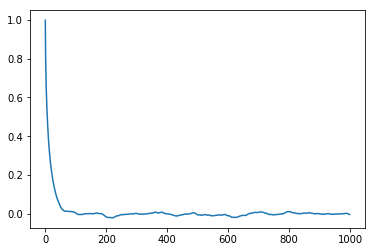

In [4]:
#Defining parameters

N = 100
beta = 1.
Num_configs = 10000

#Generate spins using Gibbs Sampling MCMC
BM = bm.BM(N=N,nature='Spin')

#Define Couplings
BM.layer.couplings =  beta* (np.eye(N=N,k=1) + np.eye(N=N,k=-1) )
BM.layer.couplings[0,-1] += beta
BM.layer.couplings[-1,0] += beta

data = BM.gen_data(Nchains=1,Nthermalize=0,Lchains=Num_configs,Nstep=1) # N steps.
print data.shape
plt.plot(data.mean(1));plt.show()
plt.imshow(data.T,aspect='auto');plt.show()

#Estimate Correlation to determine the number of steps for independent samples.
import estimate_correlations_ising
Xcorr = estimate_correlations_ising.spin_autocorr(data,n_max=int(Num_configs*0.1))
plt.plot(Xcorr);plt.show()

(10000, 100)


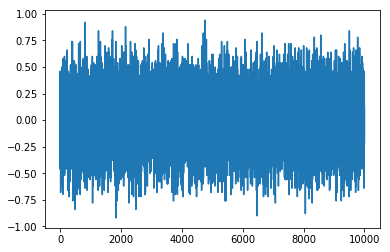

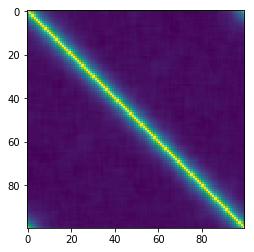

In [5]:
data = BM.gen_data(Nchains=1,Nthermalize=0,Lchains=Num_configs,Nstep=200) # N steps.
print data.shape
plt.plot(data.mean(-1))

#Finding the correlation and visualizing it
C = np.corrcoef(data.T)
plt.figure(figsize=(8,4))
plt.imshow(C)

In [34]:
%%capture capt1
#Supress the output of the cell and save it to capt1

#Train the model
RBM = rbm.RBM(visible = 'Spin', n_v=N, n_h = 1, hidden = 'Spin',zero_field = True)
results = RBM.fit(data,n_iter=500,verbose=0,learning_rate = 0.001,record=['W'],record_interval=100,batch_size=10,N_MC= 20, lr_decay=False,batch_norm=False);

In [35]:
inlineMovies.generatePlot(Ydata=np.array(results['W']),Xdata=None,xlim=None,ylim=None,frames=None,interval=20)

## Increasing the Batch Size

In [37]:
%%capture capt2
#Supress the output of the cell and save it to capt1

#Train the model
RBM = rbm.RBM(visible = 'Spin', n_v=N, n_h = 1, hidden = 'Spin',zero_field = True)
results = RBM.fit(data,n_iter=500,verbose=0,learning_rate = 0.001,record=['W'],record_interval=100,batch_size=100,N_MC= 20, lr_decay=False,batch_norm=False);

In [38]:
inlineMovies.generatePlot(Ydata=np.array(results['W']),Xdata=None,xlim=None,ylim=None,frames=None,interval=20)

## Increasing the learning rate - does the bump move

In [6]:
%%capture capt2
#Supress the output of the cell and save it to capt1
N = 100
beta = 1.
Num_configs = 10000
#Train the model
RBM = rbm.RBM(visible = 'Spin', n_v=N, n_h = 1, hidden = 'Spin',zero_field = True)
results = RBM.fit(data,n_iter=500,verbose=0,learning_rate = 0.01,record=['W'],record_interval=100,batch_size=10,N_MC= 20, lr_decay=False,batch_norm=False);

In [7]:
inlineMovies.generatePlot(Ydata=np.array(results['W']),Xdata=None,xlim=None,ylim=None,frames=None,interval=20)

## With two hidden units

In [ ]:
%%capture capt1
#Supress the output of the cell and save it to capt1

#Train the model
RBM = rbm.RBM(visible = 'Spin', n_v=N, n_h = 2, hidden = 'Spin',zero_field = True)
results = RBM.fit(data,n_iter=250,verbose=0,learning_rate = 0.001,record=['W'],record_interval=100,batch_size=10,N_MC= 20, lr_decay=False,batch_norm=False);

In [ ]:
inlineMovies.generatePlot(Ydata=np.array(results['W']),Xdata=None,xlim=None,ylim=None,frames=None,interval=20)

## With Three hidden units

In [38]:
%%capture capt1
#Supress the output of the cell and save it to capt1

#Train the model
RBM = rbm.RBM(visible = 'Spin', n_v=N, n_h = 3, hidden = 'Spin',zero_field = True)
results = RBM.fit(data,n_iter=250,verbose=0,learning_rate = 0.001,record=['W'],record_interval=100,batch_size=10,N_MC= 20, lr_decay=False,batch_norm=False);

In [149]:
reload(inlineMovies)
#print np.array(results['W']).shape
inlineMovies.generatePlot(Ydata=np.array(results['W']),Xdata=None,xlim=None,ylim=None,frames=2500,interval=20)

Using a Mean Field Model with fully connected neighbours
---------------------------------------

The correlation matrix is fully connected.

In [ ]:
N = 100
Num_configs = 1000
beta = 1.

BM.layer.couplings = beta/N * (np.ones([N,N]))

data = BM.gen_data(Nchains=1,Nthermalize=0,Lchains=Num_configs,Nstep=1) # N steps.
print data.shape
plt.plot(data.mean(1));plt.show()
plt.imshow(data.T,aspect='auto');plt.show()

#Estimate Correlation to determine the number of steps for independent samples.
import estimate_correlations_ising
Xcorr = estimate_correlations_ising.spin_autocorr(data,n_max=int(Num_configs*0.1))
plt.plot(Xcorr);plt.show()

data = BM.gen_data(Nchains=1,Nthermalize=0,Lchains=Num_configs,Nstep=200) # N steps.
print data.shape
plt.plot(data.mean(-1))

#Finding the correlation and visualizing it
C = np.corrcoef(data.T)
plt.figure(figsize=(8,4))
plt.imshow(C)


In [ ]:
%%capture capt2
#Supress the output of the cell and save it to capt1

#Train the model
RBM = rbm.RBM(visible = 'Spin', n_v=N, n_h = 1, hidden = 'Spin',zero_field = True)
results = RBM.fit(data,n_iter=100,verbose=0,learning_rate = 0.001,record=['W'],record_interval=100,batch_size=10,N_MC= 20, lr_decay=False,batch_norm=False);

In [ ]:
inlineMovies.generatePlot(Ydata=np.array(results['W'])[:,0,:],Xdata=None,xlim=None,ylim=None,frames=100,interval=20)